# Free Mint backtest

Would it actually have been worth it to participate in undiscriminated free mints?

**Methodology**:
data: analyze all collections mentioned in https://twitter.com/FreeMintsAlert
- assume 30gwei gas costs
- get opensea prices of collections with more than 1 eth volume

### Get Tweet Data
let's get all tweets from https://twitter.com/FreeMintsAlert

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import time
import snscrape.modules.twitter as sntwitter
import os

# make dirs /out and /data if it doesn't exist
if not os.path.exists("out"):
    os.makedirs("out")
if not os.path.exists("data"):
    os.makedirs("data")


tweets = []
for i, tweet in enumerate(
    sntwitter.TwitterSearchScraper("from:@FreeMintsAlert").get_items()
):
    tweets.append(tweet)

In [2]:
# turn into dataframe
tweets_df = pd.DataFrame(tweets)
tweets_df.head()

,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,quoteCount,...,media,retweetedTweet,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags
0,https://twitter.com/FreeMintsAlert/status/1549...,2022-07-20 20:06:53+00:00,🔥 FREE MINT ALERT! 🔥 \n\n🚀 NFT: The Whiro \n\n...,🔥 FREE MINT ALERT! 🔥 \n\n🚀 NFT: The Whiro \n\n...,1549848337590980609,"{'username': 'FreeMintsAlert', 'id': 151405373...",0,0,3,2,...,[{'previewUrl': 'https://pbs.twimg.com/media/F...,None,None,None,None,None,None,None,"[NFT, FreeMint, FreeMints, FreeMintAlert, NFTG...",None
1,https://twitter.com/FreeMintsAlert/status/1549...,2022-07-20 18:55:03+00:00,🔥 FREE MINT ALERT! 🔥 \n\n🚀 NFT: https://t.co/T...,🔥 FREE MINT ALERT! 🔥 \n\n🚀 NFT: angrydinos.lol...,1549830260635717632,"{'username': 'FreeMintsAlert', 'id': 151405373...",0,0,2,1,...,[{'previewUrl': 'https://pbs.twimg.com/media/F...,None,None,None,None,None,None,None,"[NFT, FreeMint, FreeMints, FreeMintAlert, NFTG...",None
2,https://twitter.com/FreeMintsAlert/status/1549...,2022-07-20 18:51:43+00:00,🔥 FREE MINT ALERT! 🔥 \n\n🚀 NFT: Kawakami Gener...,🔥 FREE MINT ALERT! 🔥 \n\n🚀 NFT: Kawakami Gener...,1549829423465222144,"{'username': 'FreeMintsAlert', 'id': 151405373...",1,1,5,1,...,[{'previewUrl': 'https://pbs.twimg.com/media/F...,None,None,None,None,None,None,None,"[NFT, FreeMint, FreeMints, FreeMintAlert, NFTG...",None
3,https://twitter.com/FreeMintsAlert/status/1549...,2022-07-20 18:25:36+00:00,🔥 FREE MINT ALERT! 🔥 \n\n🚀 NFT: Hydro Whales M...,🔥 FREE MINT ALERT! 🔥 \n\n🚀 NFT: Hydro Whales M...,1549822848977539072,"{'username': 'FreeMintsAlert', 'id': 151405373...",0,0,4,1,...,[{'previewUrl': 'https://pbs.twimg.com/media/F...,None,None,None,None,None,None,None,"[NFT, FreeMint, FreeMints, FreeMintAlert, NFTG...",None
4,https://twitter.com/FreeMintsAlert/status/1549...,2022-07-20 18:05:13+00:00,🔥 FREE MINT ALERT! 🔥 \n\n🚀 NFT: Alpha Birds Co...,🔥 FREE MINT ALERT! 🔥 \n\n🚀 NFT: Alpha Birds Co...,1549817720170074114,"{'username': 'FreeMintsAlert', 'id': 151405373...",0,2,5,1,...,[{'previewUrl': 'https://pbs.twimg.com/media/F...,None,None,None,None,None,None,None,"[NFT, FreeMint, FreeMints, FreeMintAlert, NFTG...",None


In [3]:
# lets process this dataframe a bit. let's get the unshortened urls & contract address
def unshorten(twitter_url):
    response = requests.get(twitter_url)
    return response.url


# add empty contract_address and opensea_url columnds to df
tweets_df["contract_address"] = ""
tweets_df["opensea_url"] = ""


start_time = time.time()
for idx, row in tweets_df.iterrows():
    try:
        # get the urls from the content
        content = row["content"]
        # urls match the format "https://t.co/Mz11GbzmYH"
        urls = [url for url in content.split(" ") if url.startswith("https://t.co/")]
        # get the unshortened urls
        urls = [unshorten(url) for url in urls]

        if "opensea" not in urls[0]:
            urls = urls[1:]

        opensea_url = urls[0]
        contract_address = "0x" + urls[1].split("0x")[1]
        # add the urls to the dataframe
        tweets_df.loc[idx, "opensea_url"] = opensea_url
        tweets_df.loc[idx, "contract_address"] = contract_address
        # wait one second
        # time.sleep(1)
    except:
        print(idx, urls)
        print(row["content"])
# save to csv
tweets_df.to_csv("data/tweets_df.csv")
end_time = time.time()

# run it.... this is gonna take a while.
print(f"done. finished with {len(tweets_df)} tweets in {end_time-start_time} seconds")

38 ['https://t.co/uP7xbPGc8I', 'https://t.co/IFSL71BuAD', 'https://t.co/NJnoDLsoai', 'https://t.co/DLQaM0qNka']
🔥 FREE MINT ALERT! 🔥 

🚀 NFT: https://t.co/uP7xbPGc8I 

🌊 OpenSea: https://t.co/IFSL71BuAD 

👁 Etherscan: https://t.co/NJnoDLsoai 

#NFT #FreeMint #FreeMints #FreeMintAlert #NFTGiveaway #NFTdrop https://t.co/DLQaM0qNka
49 ['https://opensea.io/collection/thekuwaitis', 'https://twitter.com/FreeMintsAlert/status/1548483473513402369/photo/1']
The Kuwaitis NFT 🇰🇼

FREE MINT ( 5 Free Mints per Wallet)

Etherscan: https://t.co/RMG1VpHZsS

Opensea: https://t.co/lx7AyT7eyK https://t.co/dGD70HL2BD
82 []
🔥 FREE MINT ALERT! 🔥 

🚀 NFT: The Mexicans 🇲🇽

❗️ WL GIVEAWAY ❗️

Prizes
🏆5x WL Spots

To enter👇
1️⃣ ❤️&amp; RT
2️⃣ Follow 
@TheMexicansNFT_
 &amp; @FreeMintsAlert
3⃣ Tag 3 Friends

⏱️ 24H

📅 Mint date: TBA

#NFT #FreeMint #FreeMints #FreeMintAlert #NFTGiveaway #NFTdrop https://t.co/LnGoE3YBur
101 ['https://t.co/RJLRGomE2n', 'https://t.co/KJL3tcH5v2', 'https://t.co/yL2jwCdMHj', 'https:/

In [12]:
# drop rows that don't have a contract address or opensea url
prev_len = len(tweets_df)
tweets_df = tweets_df[
    (tweets_df["contract_address"] != "") & (tweets_df["opensea_url"] != "")
]
print(f"dropped {prev_len-len(tweets_df)} rows with no contract address")

dropped 0 rows with no contract address


Alternatively, we can use the snscrape CLI and use command:

```snscrape --jsonl twitter-user elonmusk >twitter-@elonmusk.json```

yay for open-source devs :)

### Get price data
Now that we have the collections, lets ask opensea for stats on them. What is the floor price for them? Does it compensate for the free minting gas costs?

In [10]:
# load tweets_df from csv
tweets_df = pd.read_csv("data/tweets_df.csv")
tweets_df.head(n=1)

,Unnamed: 0,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,...,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags,contract_address,opensea_url
0,0,https://twitter.com/FreeMintsAlert/status/1549...,2022-07-20 20:06:53+00:00,🔥 FREE MINT ALERT! 🔥 \n\n🚀 NFT: The Whiro \n\n...,🔥 FREE MINT ALERT! 🔥 \n\n🚀 NFT: The Whiro \n\n...,1549848337590980609,"{'username': 'FreeMintsAlert', 'id': 151405373...",0,0,3,...,NaN,NaN,NaN,NaN,NaN,NaN,"['NFT', 'FreeMint', 'FreeMints', 'FreeMintAler...",NaN,0xd954e1d92ac3a0e7369ffc3420694857f1654b65,https://opensea.io/collection/the-whiro


In [23]:
# sample request
# curl --request GET \
#      --url https://api.opensea.io/api/v1/collection/doodles-official/stats \
#      --header 'Accept: application/json'
# convert to python
import requests


def get_collection_stats(collection_id):
    base_url = "https://api.opensea.io/api/v1/collection/"
    id = collection_id
    url = base_url + id + "/stats"
    response = requests.get(url)
    return response.json()


tweets_df["floor_price"] = 0
tweets_df["thirty_day_volume"] = 0
tweets_df["thirty_day_average_price"] = 0

# get the stats for all the doodles
for idx, row in tweets_df.iterrows():
    try:
        opensea_url = row.opensea_url
        collection_id = opensea_url.split("/")[-1]
        collection_stats = get_collection_stats(collection_id)
        floor_price = collection_stats["stats"]["floor_price"]
        thirty_day_volume = collection_stats["stats"]["thirty_day_volume"]
        thirty_day_average_price = collection_stats["stats"]["thirty_day_average_price"]
        tweets_df.loc[idx, "floor_price"] = floor_price
        tweets_df.loc[idx, "thirty_day_volume"] = thirty_day_volume
        tweets_df.loc[idx, "thirty_day_average_price"] = thirty_day_average_price
    except:
        print(idx, collection_stats)
        continue
    time.sleep(0.33)

15 {'success': False}
16 {'success': False}
22 {'success': False}
28 {'success': False}
33 {'success': False}
38 {'stats': {'one_day_volume': 0.0, 'one_day_change': 0.0, 'one_day_sales': 0.0, 'one_day_average_price': 0.0, 'seven_day_volume': 0.0, 'seven_day_change': 0.0, 'seven_day_sales': 0.0, 'seven_day_average_price': 0.0, 'thirty_day_volume': 0.0, 'thirty_day_change': 0.0, 'thirty_day_sales': 0.0, 'thirty_day_average_price': 0.0, 'total_volume': 0.0, 'total_sales': 0.0, 'total_supply': 307.0, 'count': 307.0, 'num_owners': 150, 'average_price': 0.0, 'num_reports': 0, 'market_cap': 0.0, 'floor_price': 0.05}}
46 {'success': False}
49 {'stats': {'one_day_volume': 0.0, 'one_day_change': 0.0, 'one_day_sales': 0.0, 'one_day_average_price': 0.0, 'seven_day_volume': 0.7373419989997002, 'seven_day_change': 0.0, 'seven_day_sales': 132.0, 'seven_day_average_price': 0.005585924234846214, 'thirty_day_volume': 0.7373419989997002, 'thirty_day_change': 0.0, 'thirty_day_sales': 132.0, 'thirty_day_av

In [43]:
# remove rows with 0 floor price and 0 thirty day volume and 0 thirty day average price
prev_len = len(tweets_df)
tweets_df = tweets_df[
    (tweets_df["floor_price"] != 0)
    & (tweets_df["thirty_day_volume"] != 0)
    & (tweets_df["thirty_day_average_price"] != 0)
]
print(
    f"dropped {prev_len-len(tweets_df)} rows with 0 floor price or 0 thirty day volume or 0 thirty day average price"
)

dropped 127 rows with 0 floor price or 0 thirty day volume or 0 thirty day average price


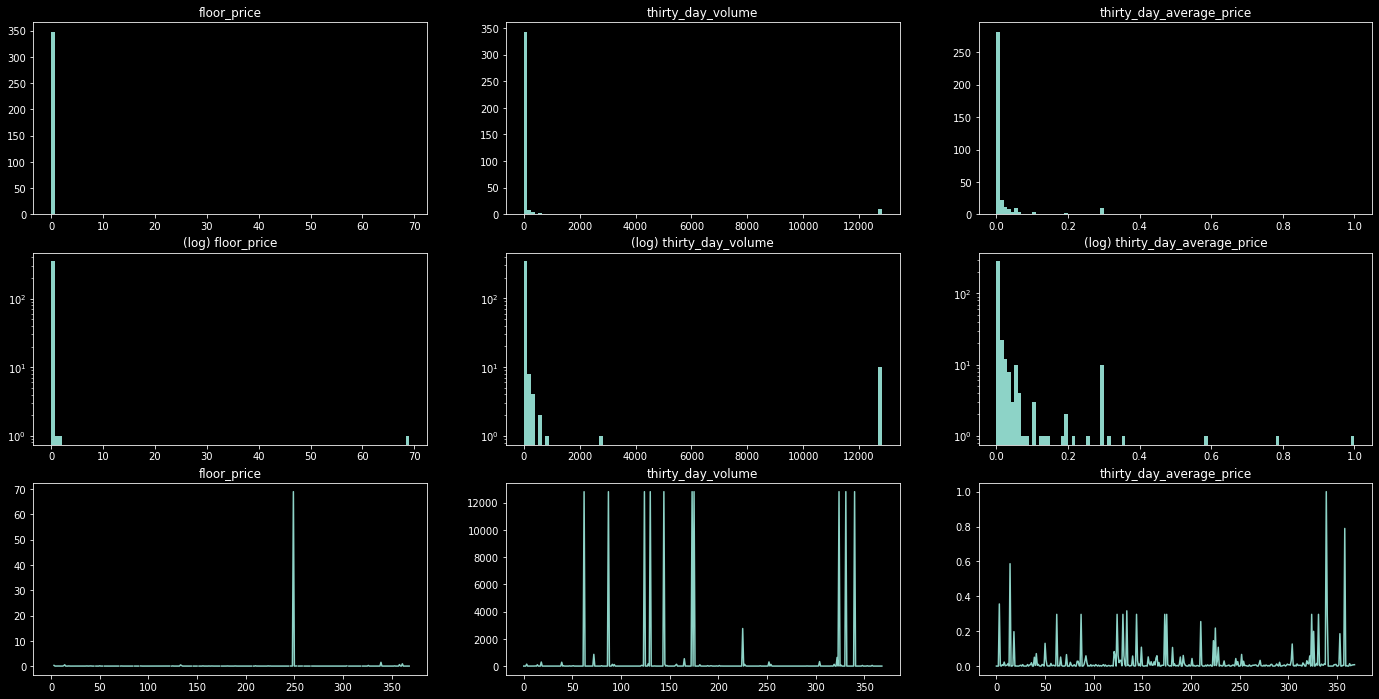

In [38]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 3, figsize=(24, 12))
# plot histogram and chart side by side, log scale
axs[0, 0].hist(tweets_df["floor_price"], bins=100)
axs[0, 0].set_title("floor_price")
axs[0, 1].hist(tweets_df["thirty_day_volume"], bins=100)
axs[0, 1].set_title("thirty_day_volume")
axs[0, 2].hist(tweets_df["thirty_day_average_price"], bins=100)
axs[0, 2].set_title("thirty_day_average_price")

axs[1, 0].hist(tweets_df["floor_price"], bins=100, log=True)
axs[1, 0].set_title("(log) floor_price")
axs[1, 1].hist(tweets_df["thirty_day_volume"], bins=100, log=True)
axs[1, 1].set_title("(log) thirty_day_volume")
axs[1, 2].hist(tweets_df["thirty_day_average_price"], bins=100, log=True)
axs[1, 2].set_title("(log) thirty_day_average_price")

# plot line chart
axs[2, 0].plot(tweets_df["floor_price"])
axs[2, 0].set_title("floor_price")
axs[2, 1].plot(tweets_df["thirty_day_volume"])
axs[2, 1].set_title("thirty_day_volume")
axs[2, 2].plot(tweets_df["thirty_day_average_price"])
axs[2, 2].set_title("thirty_day_average_price")

plt.show()

In [42]:
# calculate average 30 day price
average_thirty_day_price = tweets_df["thirty_day_average_price"].mean()
print(f"average_thirty_day_price: {average_thirty_day_price}")

average_thirty_day_price: 0.028342190155374078


that's rlly rlly profitable lol.

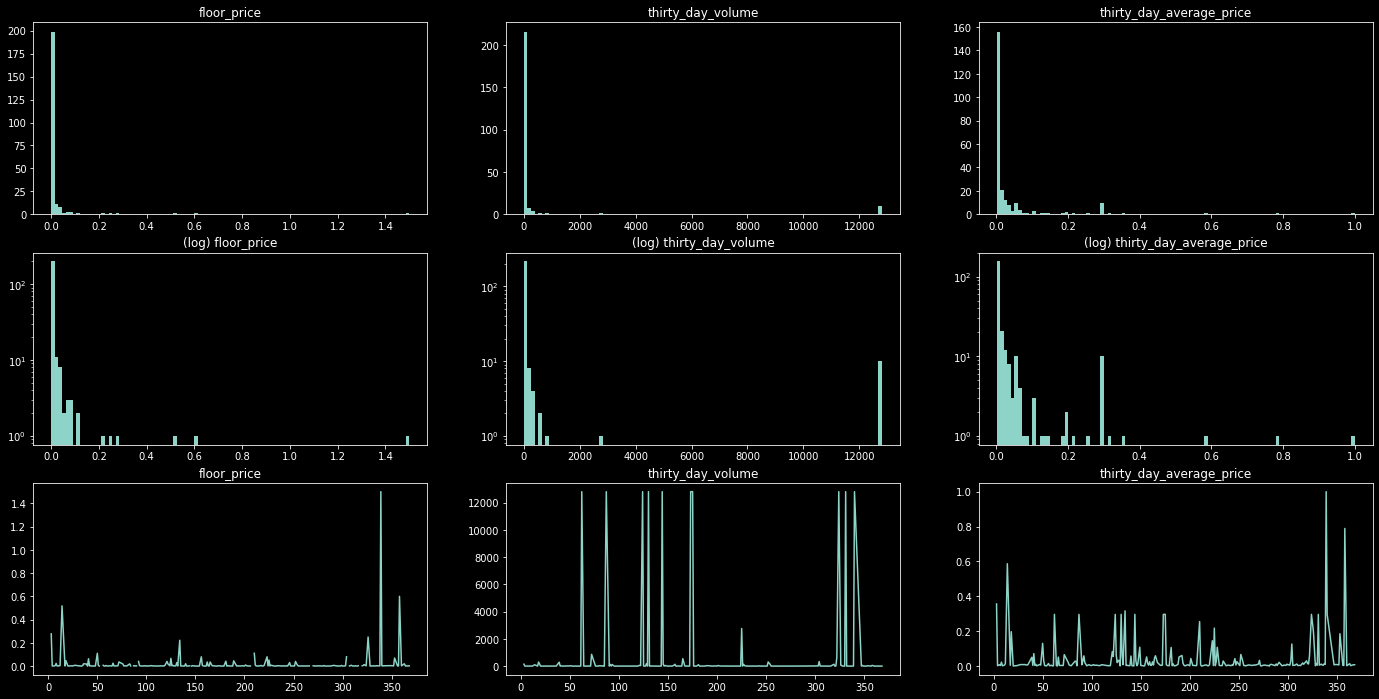

In [46]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 3, figsize=(24, 12))
# plot histogram and chart side by side, log scale
axs[0, 0].hist(tweets_df["floor_price"], bins=100)
axs[0, 0].set_title("floor_price")
axs[0, 1].hist(tweets_df["thirty_day_volume"], bins=100)
axs[0, 1].set_title("thirty_day_volume")
axs[0, 2].hist(tweets_df["thirty_day_average_price"], bins=100)
axs[0, 2].set_title("thirty_day_average_price")

axs[1, 0].hist(tweets_df["floor_price"], bins=100, log=True)
axs[1, 0].set_title("(log) floor_price")
axs[1, 1].hist(tweets_df["thirty_day_volume"], bins=100, log=True)
axs[1, 1].set_title("(log) thirty_day_volume")
axs[1, 2].hist(tweets_df["thirty_day_average_price"], bins=100, log=True)
axs[1, 2].set_title("(log) thirty_day_average_price")

# plot line chart
axs[2, 0].plot(tweets_df["floor_price"])
axs[2, 0].set_title("floor_price")
axs[2, 1].plot(tweets_df["thirty_day_volume"])
axs[2, 1].set_title("thirty_day_volume")
axs[2, 2].plot(tweets_df["thirty_day_average_price"])
axs[2, 2].set_title("thirty_day_average_price")

# save fig to output file
plt.savefig("thirty_day_average_price.png")

plt.show()

In [45]:
# calculate average 30 day price
average_thirty_day_price = tweets_df["thirty_day_average_price"].mean()
print(f"average_thirty_day_price: {average_thirty_day_price}")

average_thirty_day_price: 0.0432159841625332


Methodology isn't perfect, some things to consider, but im tired lol